# Hab Dishab Dopamine Analysis

Plotting the DA associated with different DA metrics (Peak, Mean)
- Plot the peak DA during the first investigation (With and without mice identity)
- Plot the Average peak DA across multiple investigations

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment
from bouts_extension import *

In [2]:
# NAc: #15616F
# mPFC: #FFAF00

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\nac_csvs"
# brain_region = '#15616F'

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc_csvs"
brain_region = '#FFAF00'

# experiment_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Hab Dishab/all/nac"
# csv_base_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Hab Dishab/all_csvs/nac_csvs"
# brain_region = '#15616F'

# experiment_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Hab Dishab/all/mpfc"
# csv_base_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/C1_2_3_Hab Dishab/all_csvs/mpfc_csvs"
# brain_region = '#FFAF00'

save_images = False

In [3]:
bout_definitions = [
    {'prefix': 's1', 'introduced': 's1_Introduced', 'removed': 's1_Removed'},
    {'prefix': 's2', 'introduced': 's2_Introduced', 'removed': 's2_Removed'}
]


In [4]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p1-240516-064158\Notes.txt
read from t=0s to t=1547.64s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p2-240516-071921\Notes.txt
read from t=0s to t=1556.22s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p3-240516-075659\Notes.txt
read from t=0s to t=1538.85s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p5-240821-092649\Notes.txt
read from t=0s to t=1326.46s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p6-240821-103616\Notes.txt
read from t=0s to t=1322.66s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\

### Peak standard z-score

In [5]:
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = True)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=False,
                                  max_bout_duration=4, #otal_avg_bout_duration
                                  mode='standard')

Processing behaviors for p1-240516-064158...
Processing behaviors for p2-240516-071921...
Processing behaviors for p3-240516-075659...
Processing behaviors for p5-240821-092649...
Processing behaviors for p6-240821-103616...
Processing behaviors for p7-240821-111323...
Processing behaviors for p8-240821-121933...
Processing behaviors for pp1-250115-080205...
Processing behaviors for pp2-250115-083739...
Processing behaviors for pp3-250115-091306...
Processing behaviors for pp4-250115-094555...
Processing behaviors for pp5-250114-053943...
Processing behaviors for pp6-250114-061037...
Processing behaviors for pp7-250114-070021...
Processing behaviors for pp8-250114-080316...
Computing DA metrics for p1-240516-064158 ...
Computing DA metrics for p2-240516-071921 ...
Computing DA metrics for p3-240516-075659 ...
Computing DA metrics for p5-240821-092649 ...
Computing DA metrics for p6-240821-103616 ...
Computing DA metrics for p7-240821-111323 ...
Computing DA metrics for p8-240821-121933

In [6]:
exp_da_dict = get_trial_dataframes(experiment)

In [7]:
desired_bouts = ['s1-1', 's1-2', 's1-3', 's1-4', 's1-5', 's2-1']
da_metadata_df = create_da_metrics_dataframe(exp_da_dict, behavior="Investigation", desired_bouts=desired_bouts)

In [8]:
da_metadata_df.head(6)

,Subject,Bout,Behavior,AUC,Max Peak,Mean Z-score
0,p1,s1-1,Investigation,-22.130865,2.256009,-0.777504
1,p1,s1-2,Investigation,-0.822772,-0.021747,-0.262695
2,p1,s1-3,Investigation,-0.737071,-0.315245,-0.469457
3,p1,s1-4,Investigation,1.394892,2.305249,2.108336
4,p1,s1-5,Investigation,-1.043822,-0.554930,-0.763883
5,p1,s2-1,Investigation,14.657135,2.772954,1.704500


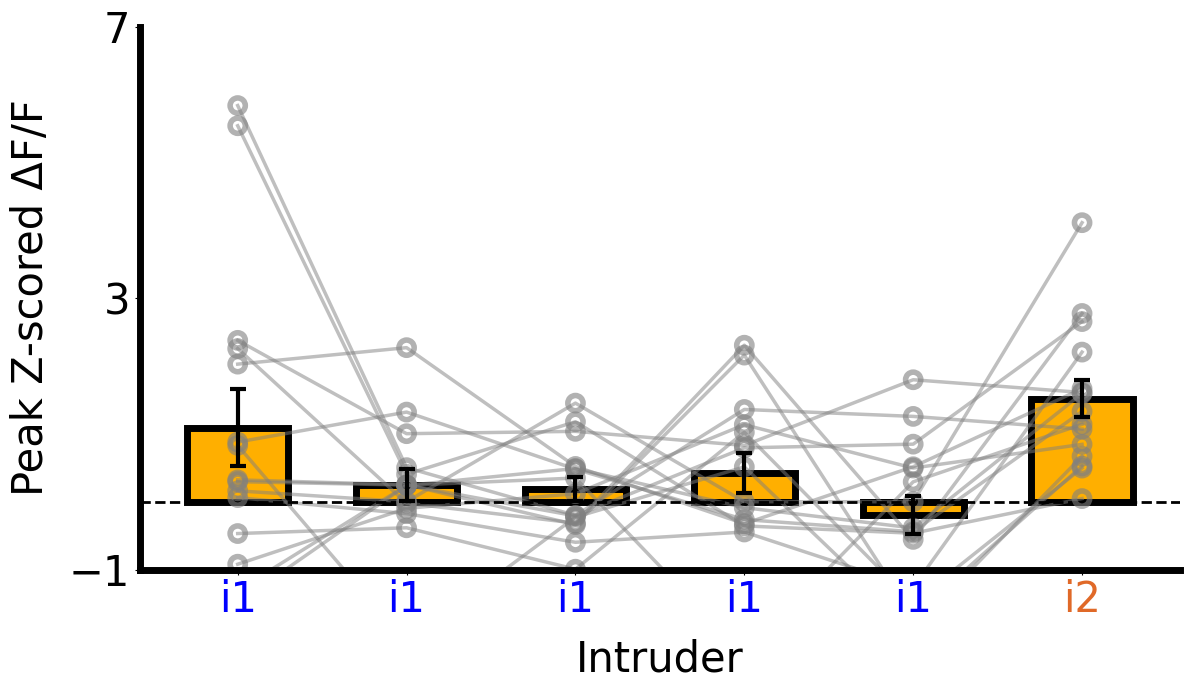


Paired t-test results (all pairwise combinations):
s1-1 vs s1-2: p = 0.1540 (ns)
s1-1 vs s1-3: p = 0.1261 (ns)
s1-1 vs s1-4: p = 0.2669 (ns)
s1-1 vs s1-5: p = 0.0358 (*)
s1-1 vs s2-1: p = 0.5433 (ns)
s1-2 vs s1-3: p = 0.7859 (ns)
s1-2 vs s1-4: p = 0.6740 (ns)
s1-2 vs s1-5: p = 0.0928 (ns)
s1-2 vs s2-1: p = 0.0026 (**)
s1-3 vs s1-4: p = 0.5563 (ns)
s1-3 vs s1-5: p = 0.1566 (ns)
s1-3 vs s2-1: p = 0.0004 (***)
s1-4 vs s1-5: p = 0.1677 (ns)
s1-4 vs s2-1: p = 0.0177 (*)
s1-5 vs s2-1: p = 0.0002 (***)

Paired t-test results New:
s1-1 vs s1-2: p = 0.1540 (ns), d = 0.389
s1-1 vs s1-3: p = 0.1261 (ns), d = 0.420
s1-1 vs s1-4: p = 0.2669 (ns), d = 0.299
s1-1 vs s1-5: p = 0.0358 (*), d = 0.600
s1-1 vs s2-1: p = 0.5433 (ns), d = -0.161
s1-2 vs s1-3: p = 0.7859 (ns), d = 0.071
s1-2 vs s1-4: p = 0.6740 (ns), d = -0.111
s1-2 vs s1-5: p = 0.0928 (ns), d = 0.466
s1-2 vs s2-1: p = 0.0026 (**), d = -0.945
s1-3 vs s1-4: p = 0.5563 (ns), d = -0.156
s1-3 vs s1-5: p = 0.1566 (ns), d = 0.386
s1-3 vs s2-1: p 

In [16]:
# Average Bout Duration Across Bouts
plot_behavior_across_bouts_no_identities(
    metadata_df=da_metadata_df,
    y_col="Max Peak",
    behavior="Investigation",
    title=None,
    xlabel="Intruder",
    ylabel="Peak Z-scored ΔF/F",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(-1, 5),
    bar_color=brain_region,
    yticks_increment=4,
    figsize=(12,7),
    pad_inches=0.1,
    save=None,
    save_name=r"Hab_Dishab_Plots\mPFC_DA\mPFC_C1_3_Peak"
)

In [10]:
from statsmodels.stats.multitest import multipletests

# your two raw p‐values:
comparisons = ["s1-1 vs s1-2", "s1-5 vs s2-1"]
raw_p     = [0.0076,      0.003]

# Holm–Bonferroni
reject, p_adj, _, _ = multipletests(raw_p, alpha=0.05, method='holm')

for comp, p0, p1, rej in zip(comparisons, raw_p, p_adj, reject):
    sig = "✓" if rej else "n.s."
    print(f"{comp}: raw p = {p0:.4f}, Holm-adj p = {p1:.4f} → {sig}")


s1-1 vs s1-2: raw p = 0.0076, Holm-adj p = 0.0076 → ✓
s1-5 vs s2-1: raw p = 0.0030, Holm-adj p = 0.0060 → ✓


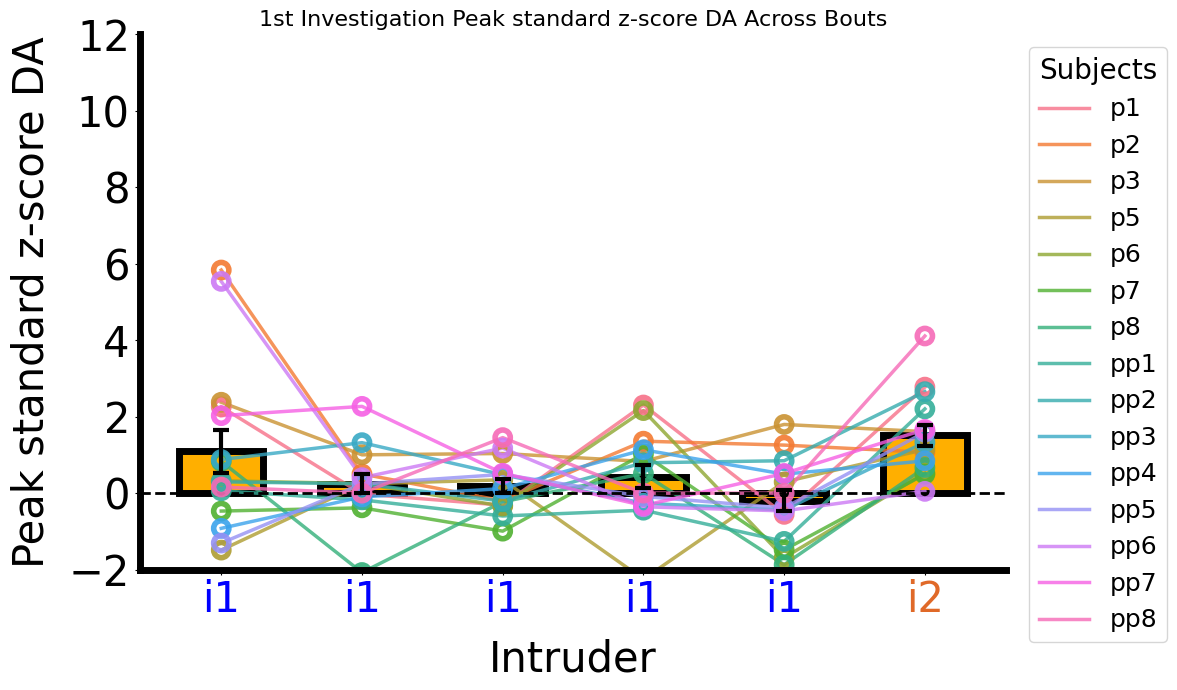

In [11]:
# Average Bout Duration Across Bouts
plot_behavior_across_bouts_with_identities(
    metadata_df=da_metadata_df,
    y_col="Max Peak",
    behavior="Investigation",
    title="1st Investigation Peak standard z-score DA Across Bouts",
    xlabel="Intruder",
    ylabel="Peak standard z-score DA",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(-2, 11),
    bar_color=brain_region,
    yticks_increment=2,
    figsize=(12,7),
    pad_inches=0.1,
    save=None,
    save_name=r"Hab_Dishab_Plots\mPFC_DA\mPFC_Peak_Across_Bouts_WIDENTITIES.png"
)

Restart because not only looking at first investigation any longer

In [12]:
experiment.reset_all_behaviors()
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=False,
                                  max_bout_duration=4, # total_avg_bout_duration 
                                  mode='standard')

Processing behaviors for p1-240516-064158...
Processing behaviors for p2-240516-071921...
Processing behaviors for p3-240516-075659...
Processing behaviors for p5-240821-092649...
Processing behaviors for p6-240821-103616...
Processing behaviors for p7-240821-111323...
Processing behaviors for p8-240821-121933...
Processing behaviors for pp1-250115-080205...
Processing behaviors for pp2-250115-083739...
Processing behaviors for pp3-250115-091306...
Processing behaviors for pp4-250115-094555...
Processing behaviors for pp5-250114-053943...
Processing behaviors for pp6-250114-061037...
Processing behaviors for pp7-250114-070021...
Processing behaviors for pp8-250114-080316...
Computing DA metrics for p1-240516-064158 ...
Computing DA metrics for p2-240516-071921 ...
Computing DA metrics for p3-240516-075659 ...
Computing DA metrics for p5-240821-092649 ...
Computing DA metrics for p6-240821-103616 ...
Computing DA metrics for p7-240821-111323 ...
Computing DA metrics for p8-240821-121933

In [13]:
exp_da_dict = get_trial_dataframes(experiment)
desired_bouts = ['s1-1', 's1-2', 's1-3', 's1-4', 's1-5', 's2-1']

IMPORTANT NOTE OF FUNCTION: the reason why there might be a discrepancy in the number of mice displayed is because if a subject doesn't have x subsequent investigations, then the mouse is not included

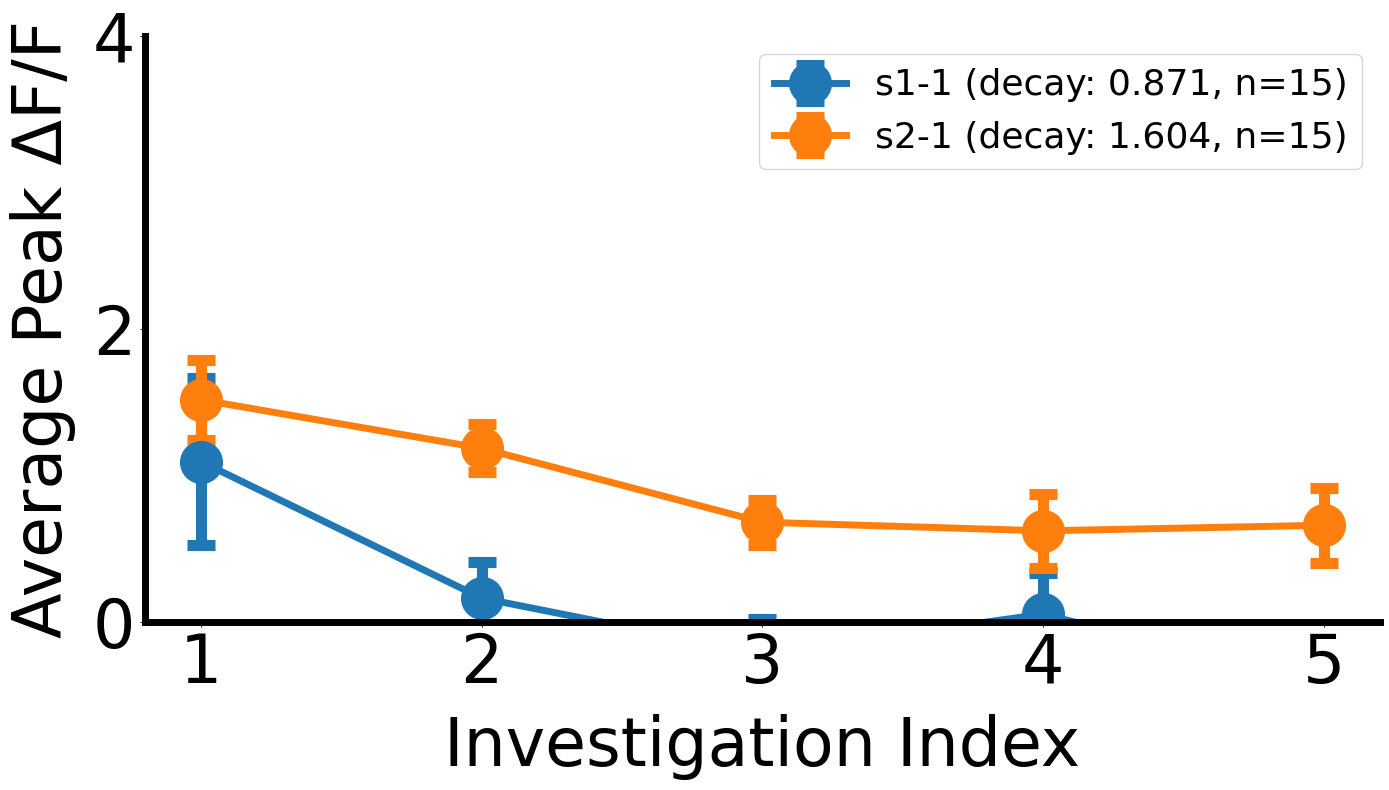


=== Computed Metric (DECAY): ===
Bout: s1-1, decay = 0.871
Bout: s2-1, decay = 1.604


,Bout,BehaviorIndex,SubjectCount,AvgPeak,StdPeak,SEM
0,s1-1,1,15,1.093019,2.209132,0.570395
1,s1-1,2,15,0.160493,0.953320,0.246146
2,s1-1,3,15,-0.219958,0.925305,0.238913
3,s1-1,4,14,0.051772,1.048122,0.280122
4,s1-1,5,13,-0.440291,0.851373,0.236129
5,s2-1,1,15,1.515499,1.063575,0.274614
6,s2-1,2,15,1.183904,0.632148,0.163220
7,s2-1,3,15,0.679098,0.595237,0.153689
8,s2-1,4,13,0.620005,0.904291,0.250805
9,s2-1,5,13,0.658089,0.927834,0.257335


In [14]:
plot_peak_for_subsequent_behaviors(
    exp_da_dict,
    behavior="Investigation",
    selected_bouts=["s1-1", "s2-1"],
    n_subsequent_behaviors=5,
    peak_col="Max Peak",
    metric_type='decay', 
    xlabel="Investigation Index",
    ylabel="Average Peak ΔF/F",
    ylim=(0, 3),
    ytick_increment=2,
    plot_title="",
    save = False,
    save_path=r"Hab_Dishab_Plots\mPFC_DA\peaks_for_subsequent_behaviors.png" 
)

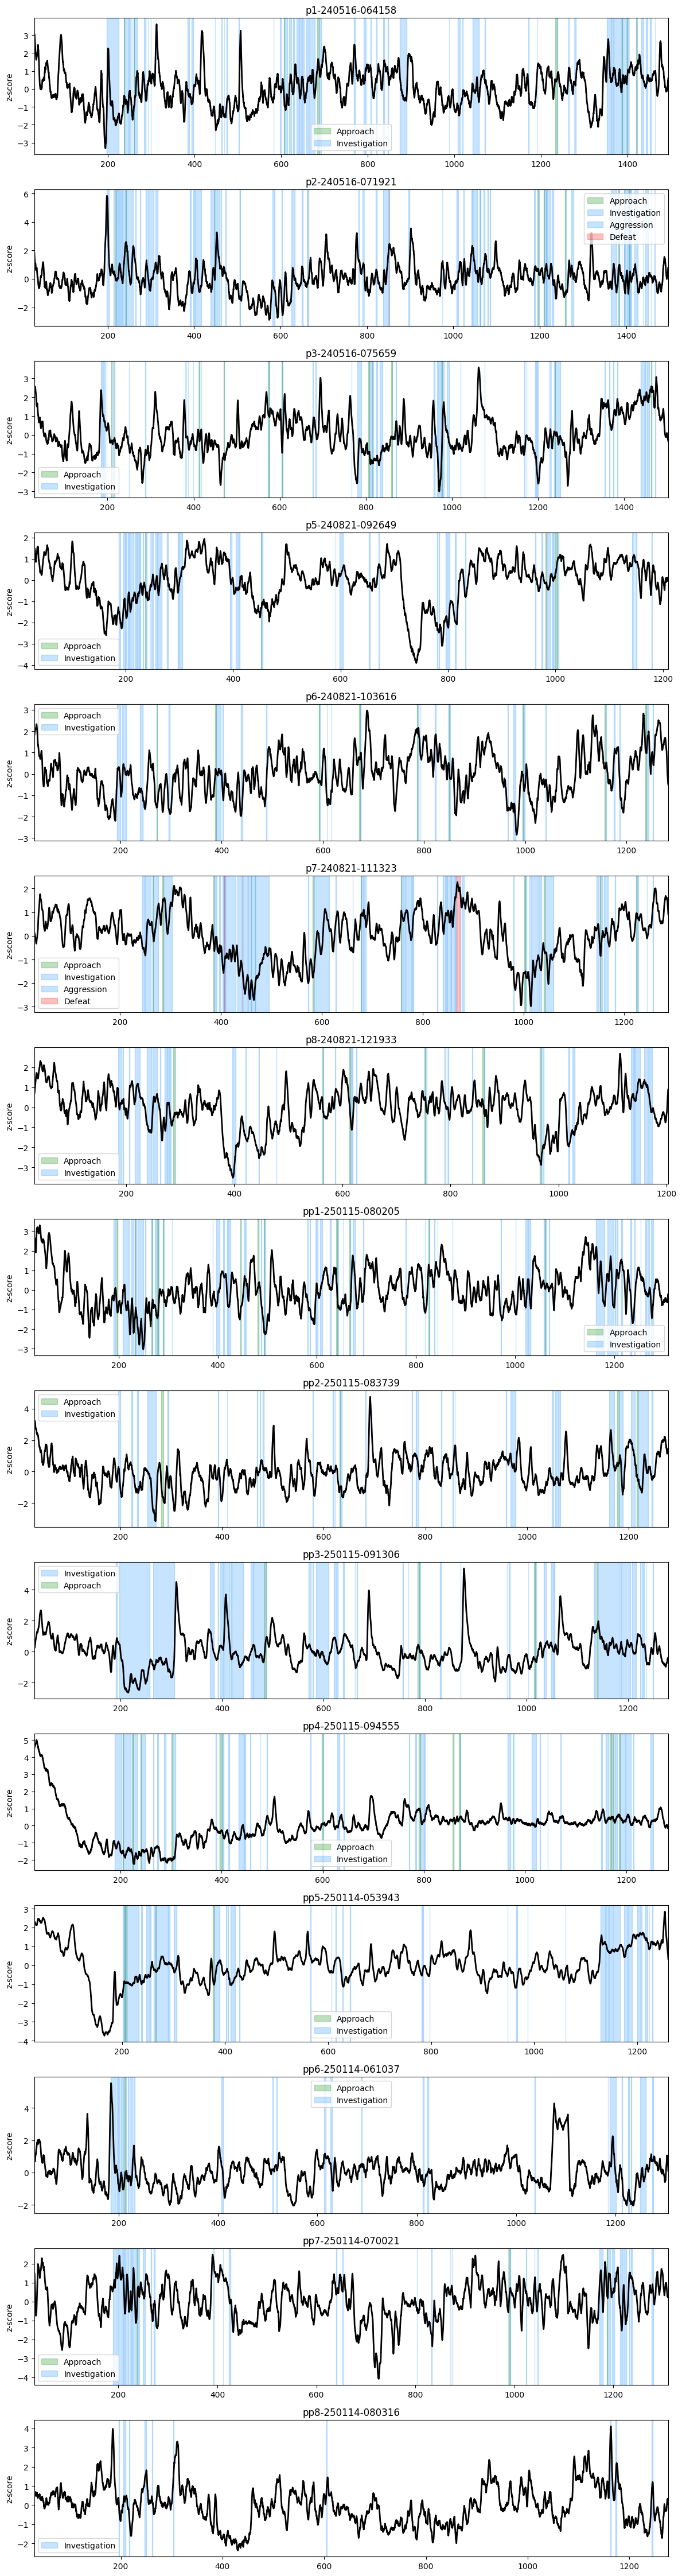

In [15]:
experiment.plot_all_traces(ylim=None)